# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import torch
import torch.nn as nn
import torch.optim as optim

Numpy --> Arrays & Math

In [2]:
arr = np.array([1, 2, 3, 4])
print("Mean:", arr.mean())

Mean: 2.5


Numpy Matrix Operations

In [3]:
# Convert data to NumPy arrays
humidity = np.array([60, 80, 90, 70, 25, 65, 30, 40])
temp = np.array([18, 25, 27, 19, 32, 14, 21, 26])

# Example 1: Elementwise operations
print("Humidity + Temp =", humidity + temp)

# Example 2: Matrix multiplication
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])
print("Matrix Multiplication:\n", A @ B)   # instead of loops

# Example 3: Reshape & vectorized computation
X = np.column_stack((humidity, temp))   # shape (8,2)
print("Dataset shape:", X.shape)
print("Mean of each column:", X.mean(axis=0))
print("Mean of each row:", X.mean(axis=1))


Humidity + Temp = [ 78 105 117  89  57  79  51  66]
Matrix Multiplication:
 [[19 22]
 [43 50]]
Dataset shape: (8, 2)
Mean of each column: [57.5  22.75]
Mean of each row: [39.  52.5 58.5 44.5 28.5 39.5 25.5 33. ]


In [4]:
# Access a single element
print("The first humidity value is:", humidity[0])

# Slice a part of an array
print("The temp values from the 2nd to 4th are:", temp[1:4])

# Access an element in a 2D array (row, column)
print("The 1st row, 2nd column value is:", X[0, 1])

The first humidity value is: 60
The temp values from the 2nd to 4th are: [25 27 19]
The 1st row, 2nd column value is: 18


In [5]:
# Add a constant value to every element
print("Humidity shifted by 10:", humidity + 10)

# Multiply all temperature values by a constant
print("Temp in Fahrenheit:", temp * 9/5 + 32)

Humidity shifted by 10: [ 70  90 100  80  35  75  40  50]
Temp in Fahrenheit: [64.4 77.  80.6 66.2 89.6 57.2 69.8 78.8]


In [6]:
# Use a universal function (ufunc)
print("Square root of humidity values:", np.sqrt(humidity))

# Show other common aggregations
print("Max temperature:", temp.max())
print("Min temperature:", temp.min())
print("Total sum of all humidity values:", humidity.sum())

Square root of humidity values: [7.74596669 8.94427191 9.48683298 8.36660027 5.         8.06225775
 5.47722558 6.32455532]
Max temperature: 32
Min temperature: 14
Total sum of all humidity values: 460


In [7]:
# Create a boolean mask: is humidity above 50?
high_humidity_mask = humidity > 50
print("Boolean mask:", high_humidity_mask)

# Use the mask to select values
print("Values where humidity is > 50:", humidity[high_humidity_mask])

# Get temperatures for days where humidity was low (< 50)
print("Temperatures where humidity was low:", temp[humidity < 50])

Boolean mask: [ True  True  True  True False  True False False]
Values where humidity is > 50: [60 80 90 70 65]
Temperatures where humidity was low: [32 21 26]


In [8]:
# Reshape a 1D array into a 2x4 matrix
reshaped_humidity = humidity.reshape(2, 4)
print("Reshaped humidity:\n", reshaped_humidity)

# Transpose the 2D dataset
transposed_X = X.T
print("Transposed dataset shape:", transposed_X.shape)
print("Transposed dataset:\n", transposed_X)

Reshaped humidity:
 [[60 80 90 70]
 [25 65 30 40]]
Transposed dataset shape: (2, 8)
Transposed dataset:
 [[60 80 90 70 25 65 30 40]
 [18 25 27 19 32 14 21 26]]


In [9]:
fruits = np.array(['apple', 'banana', 'apple', 'orange', 'banana'])

# Sort the humidity array
print("Sorted humidity values:", np.sort(humidity))

# Find the unique elements in the fruits array
print("Unique fruits:", np.unique(fruits))

Sorted humidity values: [25 30 40 60 65 70 80 90]
Unique fruits: ['apple' 'banana' 'orange']


Pandas –-> Data Handling

In [10]:
data = {"Humidity": [60, 80, 90, 70, 25, 65, 30, 40], "Temp": [18, 25, 27, 19, 32, 14, 21, 26]}
df = pd.DataFrame(data)
print(df.head())

   Humidity  Temp
0        60    18
1        80    25
2        90    27
3        70    19
4        25    32


# Data Visualization

Matplotlib --> Visualization

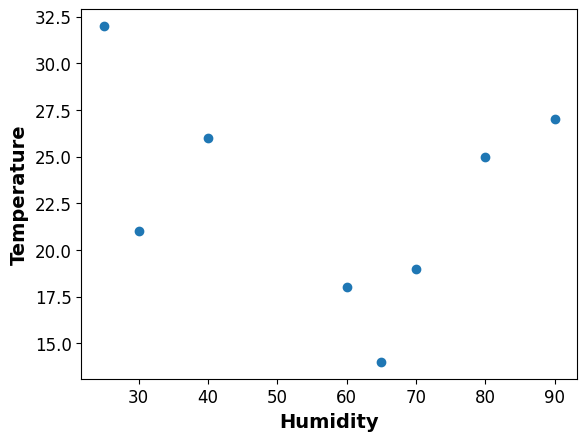

In [11]:
#1 Scatter Plot
plt.scatter(df["Humidity"], df["Temp"])
plt.xlabel("Humidity", fontsize=14, fontweight='bold')
plt.ylabel("Temperature", fontsize=14, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


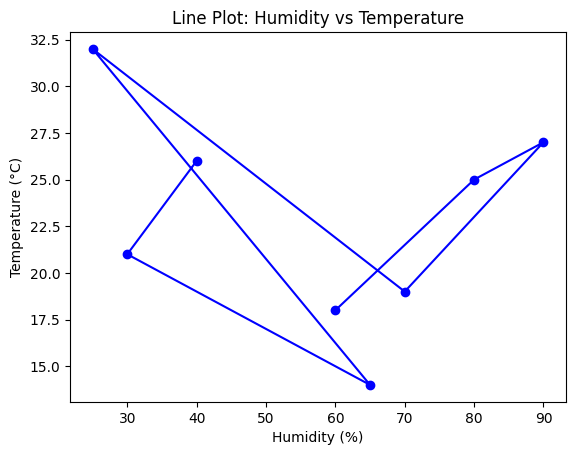

In [12]:
#2 Line Plot
plt.plot(df["Humidity"], df["Temp"], marker='o', color="blue")
plt.title("Line Plot: Humidity vs Temperature")
plt.xlabel("Humidity (%)")
plt.ylabel("Temperature (°C)")
plt.show()

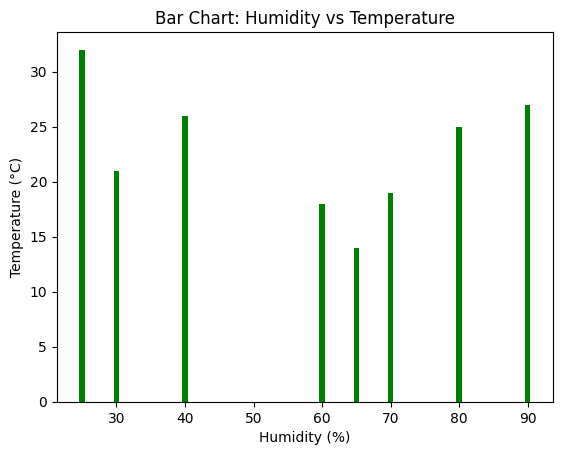

In [13]:
#3 Bar Chart
plt.bar(df["Humidity"], df["Temp"], color="green")
plt.title("Bar Chart: Humidity vs Temperature")
plt.xlabel("Humidity (%)")
plt.ylabel("Temperature (°C)")
plt.show()

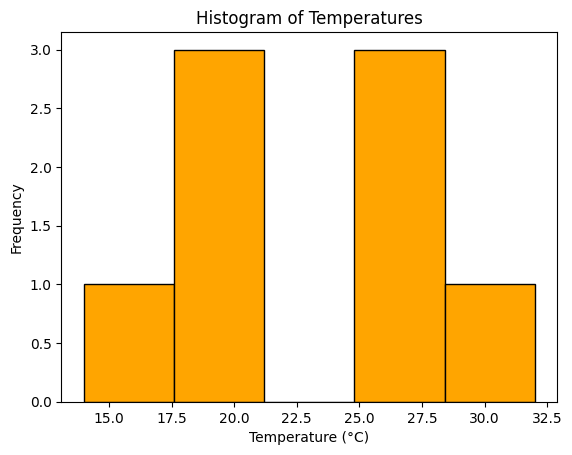

In [14]:
# 4. Histogram (Temperatures only)
plt.hist(df["Temp"], bins=5, color="orange", edgecolor="black")
plt.title("Histogram of Temperatures")
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")
plt.show()

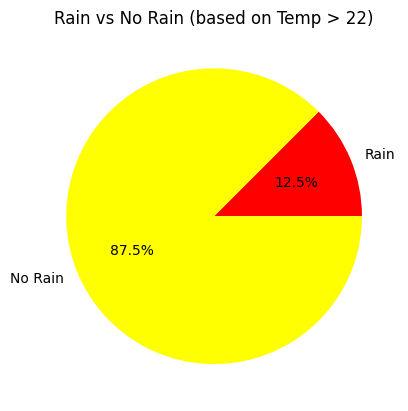

In [15]:
# 5. Pie Chart (Rain vs No Rain – just an example)
# Assume: Temp > 27 → Rain, else → No Rain
rain = (df["Temp"] > 27).sum()
no_rain = len(df) - rain

plt.pie([rain, no_rain],
        labels=["Rain", "No Rain"],
        autopct="%1.1f%%",
        colors=["red", "yellow"])
plt.title("Rain vs No Rain (based on Temp > 22)")
plt.show()

# Play around with a sample dataset

In [16]:
# Load dataset
df = pd.read_csv("https://raw.githubusercontent.com/hasibulhshovo/COMP432/main/lab1/dataset/sample_dataset.csv")
print(df.head())

# Inspect datasetgit pu
print("Shape:", df.shape)
print("Columns:", df.columns)
print(df.describe())   # summary stats

# Select specific columns
print("Humidity values:\n", df["Humidity  (%)"].head())

# Filtering
print("Days with high humidity:\n", df[df["Humidity  (%)"] > 70])

# Group by Rain
print("Average Temp grouped by Rain:\n", df.groupby("Rain")["Temperature (degree Celsius)"].mean())


   Day No.  Humidity  (%)  Temperature (degree Celsius) Rain
0        1             80                            20  Yes
1        2             20                            15   No
2        3             70                            25  Yes
3        4             30                            24  Yes
4        5             55                            28   No
Shape: (10, 4)
Columns: Index(['Day No.', 'Humidity  (%)', 'Temperature (degree Celsius)', 'Rain'], dtype='object')
        Day No.  Humidity  (%)  Temperature (degree Celsius)
count  10.00000      10.000000                     10.000000
mean    5.50000      54.100000                     20.700000
std     3.02765      19.456219                      4.164666
min     1.00000      20.000000                     15.000000
25%     3.25000      44.250000                     17.500000
50%     5.50000      55.500000                     20.500000
75%     7.75000      69.500000                     23.500000
max    10.00000      80.000000

In [17]:
humidity = df["Humidity  (%)"].values
temp = df["Temperature (degree Celsius)"].values


In [18]:
# Prepare features and labels
X = df[["Humidity  (%)", "Temperature (degree Celsius)"]]
y = (df["Rain"] == "Yes").astype(int)  # Convert Yes/No to 1/0

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

print("Predictions:", y_pred)
print("Accuracy:", round(accuracy_score(y_test, y_pred), 2))


Predictions: [1 1 1]
Accuracy: 0.33


Pytorch Opertions

In [19]:
# Convert dataset to PyTorch tensors
X = torch.tensor(df[["Humidity  (%)", "Temperature (degree Celsius)"]].values, dtype=torch.float32)
y = torch.tensor((df["Rain"] == "Yes").astype(int).values, dtype=torch.float32).unsqueeze(1)

# ---- Tensor Operations Demo ----
print("Tensor Shape:", X.shape)
print("Mean per column:", X.mean(dim=0))
print("Matrix multiplication:\n", X.T @ X)  # covariance-like matrix
print("Elementwise addition:\n", X[:,0] + X[:,1])

# ---- Define simple logistic regression model ----
model = nn.Sequential(
    # A single linear layer that takes 2 input features and outputs 1, acting as a single neuron.
    nn.Linear(2, 1),
    # The sigmoid activation function converts the output to a probability between 0 and 1.
    nn.Sigmoid()
)

# The Binary Cross-Entropy loss function, ideal for binary classification tasks. It measures the difference between the model's predicted probability and the true label.
criterion = nn.BCELoss()
# The Stochastic Gradient Descent (SGD) optimizer adjusts the model's parameters to minimize the loss. `model.parameters()` tells the optimizer which values to update. `lr=0.01` is the learning rate, which controls the size of the updates.
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training loop
for epoch in range(300):
    # Perform a forward pass: Feed the input data `X` into the model to get predictions `y_pred`.
    y_pred = model(X)
    # Calculate the loss: Compare the model's predictions with the actual target values `y`.
    loss = criterion(y_pred, y)
    # Zero out the gradients: Clear any gradients from the previous training step to prevent accumulation.
    optimizer.zero_grad()
    # Perform a backward pass: Calculate the gradients of the loss with respect to the model's parameters.
    loss.backward()

    # Update the parameters: Adjust the model's weights and biases based on the calculated gradients.
    optimizer.step()

# Get the model's final predictions
# .detach() is used to remove the tensor from the computation graph
# .numpy() converts the tensor to a NumPy array for easier manipulation
y_pred_np = model(X).detach().numpy()

# Convert probabilities to binary predictions (0 or 1)
# > 0.5 acts as the threshold for classification
y_pred_binary = (y_pred_np > 0.5).astype(int)

# Compare the binary predictions with the actual values (y)
# (y_pred_binary == y.numpy()) returns a boolean array
correct_predictions = (y_pred_binary == y.numpy()).sum()

# Calculate the prediction percentage (accuracy)
total_predictions = len(y)
prediction_percentage = (correct_predictions / total_predictions) * 100


print("Final Loss:", loss.item())
print("Predictions:", y_pred_binary.ravel())
print(f"Prediction Percentage: {prediction_percentage:.2f}%")


Tensor Shape: torch.Size([10, 2])
Mean per column: tensor([54.1000, 20.7000])
Matrix multiplication:
 tensor([[32675., 11324.],
        [11324.,  4441.]])
Elementwise addition:
 tensor([100.,  35.,  95.,  54.,  83.,  87.,  66.,  90.,  60.,  78.])
Final Loss: 0.8010292053222656
Predictions: [1 0 1 0 0 1 0 1 1 1]
Prediction Percentage: 70.00%
